In [ ]:
import time, sys

def countdown(t):
    while t:
        mins, secs = divmod(t, 60)
        timeformat = '{:02d}:{:02d}'.format(mins, secs)
        sys.stdout.write('\r' + str(timeformat))
        sys.stdout.flush()
        time.sleep(1)
        t -= 1
    print("Time's Up! \n")

In [ ]:
countdown(1 * 60)

In [ ]:
import os

import pandas as pd
from pandas import Series, DataFrame 

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.set_option('notebook_repr_html', False) 

%pylab inline 

print pd.__version__

path = os.getcwd()
path

In [ ]:
import os

-------------------------------------------------------------------------------------------------

## Check the contents of the Working Directory

In [ ]:
!ls

In [ ]:
os.listdir(path + '/Data')

---

## Inspect Data

- First try importing a sample of the file to get an idea of 
    - delimiter
    - data types for each column (especially watch out for columns with mixed types)
    - missing value indicators
- Then, import the whole file

---

#### 1. Use CLI commands to inspect your file without opening/importing it

In [ ]:
os.chdir(path + '/Data/')

In [ ]:
!ls

In [ ]:
! head -n 5 u.user

In [ ]:
!wc -l u.user

In [ ]:
! head -n 4 u.item

In [ ]:
!wc -l u.item

In [ ]:
! head -n 5 u.data

In [ ]:
!wc -l u.data

### We find that 

- There are different delimiters in each file
- The column names aren't provided, so we'll have to supply them
---

## Import Data

- `read_csv()` arguments used here
    - `sep=`, 
    - `names=` 
    - `usecols=`   

### 1. Users data

In [ ]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(path + '/Data/u.user', sep='|', names=u_cols)
users.head()

### 2. Ratings data

In [ ]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv(path + '/Data/u.data', sep='\t', names=r_cols)
ratings.head()

In [ ]:
ratings['timestamp'] = pd.to_datetime(ratings['unix_timestamp'], unit='s')

ratings.drop('unix_timestamp', axis=1, inplace=True)

In [ ]:
ratings.head()

### 3. Movies Data

- the movies file contains columns indicating the movie's genres
- let's only load the first five columns of the file with usecols

In [ ]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

movies = pd.read_csv(path + '/Data/u.item', sep='|', names=m_cols, usecols=range(5))
print movies.head()

In [ ]:
movies['release_date'] = movies.release_date.map(lambda x: pd.to_datetime(x))

In [ ]:
movies.head()

---

## Explore Data

### The `.dtypes` method

In [ ]:
# for getting basic information about your DataFrame, try
print movies.dtypes, '\n'
print ratings.dtypes, '\n'
print users.dtypes

### The `describe()` method

is great for seeing basic statistics about ALL numeric columns in a dataset.

In [23]:
users['age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

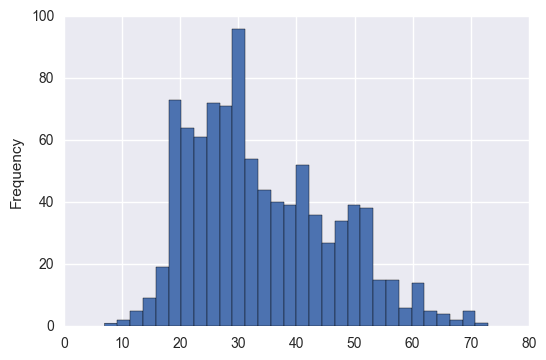

In [25]:
users['age'].plot.hist(bins=30);

In [26]:
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

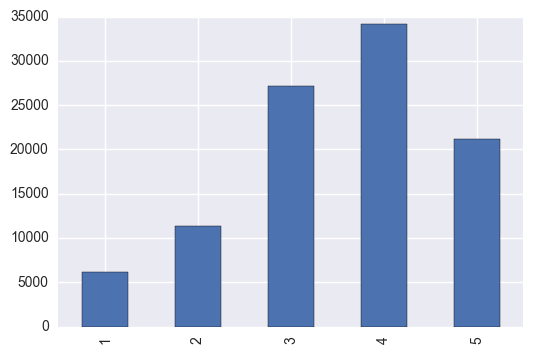

In [27]:
ratings['rating'].value_counts().sort_index().plot.bar();

---
## Slicing

*** Selecting a single column*** from the DataFrame will return a Series object.

In [28]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

***To select multiple columns***, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [29]:
users[['age', 'zip_code']].head()

   age zip_code
0   24    85711
1   53    94043
2   23    32067
3   24    43537
4   33    15213

***Row selection*** can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [30]:
# users older than 25
print users[users.age > 25].head(3)
print '\n'

# users aged 40 AND male
print users[(users.age == 40) & (users.sex == 'M')].head(3)
print '\n'

# users younger than 30 OR female
print users[(users.sex == 'F') | (users.age < 30)].head(3)

   user_id  age sex occupation zip_code
1        2   53   F      other    94043
4        5   33   F      other    15213
5        6   42   M  executive    98101


     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067


-------------------------------------------------------------------------------------------------

## Using `set_index`  


The default (automatically generated) index is mostly meaningless. We can change it using the `set_index()` method. 

Let's set it to the `user_id`. 

By default, `set_index` returns a new DataFrame, so you'll have to specify if you'd like the changes to occur in place.

In [ ]:
print users.set_index('user_id').head()
print '\n'

print users.head()
print "\n Changes weren't applied. \n\n"

users.set_index('user_id', inplace=True)
print users.head()
print "\n Changes were applied. \n\n"

In [ ]:
# To modify the df without creating a copy, use inplace=True
users.set_index('user_id', inplace=True)
users.head()

If we realize later that we liked the old pandas default index, we can just use ***`reset_index`*** 

The same rules for inplace apply.

In [ ]:
users.reset_index(inplace=True)
print users.head()

We can ***select rows based on the index*** using _the ix method_.

In [ ]:
print users.ix[99]
print '\n'
print users.ix[[1, 50, 300]]

-------------------------------------------------------------------------------------------------

## Sorting

To sort a DataFrame, we use the `sort_values` method

In [ ]:
# To sort a DataFrame: users in descending order of age
users.sort_values(by='age', ascending=False, inplace=True)
users.head()

In [ ]:
# To sort a Series
users['age'].sort_values(ascending=False).head()

-------------------------------------------------------------------------------------------------

## Join! (merging)
With the movie data, it's possible for a user to be associated with zero or many ratings and movies. 

Likewise, a movie can be rated zero or many times, by a number of different users.

`pandas.merge` allows two DataFrames to be joined on one or more keys. The function provides a series of parameters (`on, left_on, right_on, left_index, right_index`) allowing you to specify the columns or indexes on which to join.

By default, pandas.merge operates as an inner join, which can be changed using ***the `how` parameter.***

In [ ]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print left_frame
print '\n'
print right_frame


In [ ]:
pd.merge(left_frame, right_frame)

#### pd.merge parameters

* _Had our key columns not been named the same_, we could have used the ***left_on and right_on parameters*** to specify which fields to join from each frame.

`pd.merge(left_frame, right_frame, left_on='left_key', right_on='right_key')`


* Alternatively, _if our keys were indexes_, we could use the ***left_index or right_index parameters***, which accept a True/False value. 



You can ***mix and match columns and indexes*** like so: 

`pd.merge(left_frame, right_frame, left_on='key', right_index=True)`

##### left/right outer join

In [ ]:
pd.merge(left_frame, right_frame, on='key', how='left')

In [ ]:
# We keep everything from the left frame, pulling in the value from the right frame where the keys match up. 
# The right_value is NULL where keys do not match (NaN)

##### Full Outer Join

In [ ]:
pd.merge(left_frame, right_frame, on='key', how='outer')

In [ ]:
# We've kept everything from both frames, regardless of whether or not there was a match on both sides. 
# Where there was not a match, the values corresponding to that key are NULL.

-------------------------------------------------------------------------------------------------

### Append! (concatenating/union-ing)

`pandas.concat` takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects. 

Note that because the function takes list, you can combine many objects at once.

*** By default**, the function will vertically append the objects to one another, combining columns with the same name. 

In [ ]:
pd.concat([left_frame, right_frame])

We can see above that values not matching up will be NULL.

Additionally, objects can be _concatentated side-by-side_ using the function's ***`axis` parameter***

In [ ]:
pd.concat([left_frame, right_frame], axis=1)

This is something like a cbind.

-------------------------------------------------------------------------------------------------

### groupby!
The pandas `groupby` method draws largely from the split-apply-combine strategy for data analysis.


In [ ]:
sac = DataFrame({'numbers': np.random.randn(100), 'letters': list('abcde') * 20})

In [ ]:
sac[:5]

In [ ]:
sac.groupby('letters').sum()

In [ ]:
sac.groupby('letters').count()

In [ ]:
# NOTE: count() returns a DataFrame object, whereas size() returns a Series object
sac.groupby('letters').size()

In [ ]:
# also;
sac.letters.value_counts()

In [ ]:
# Let's find the youngest male reviewer by occupation

In [ ]:
users.head()

In [ ]:
(users
 .groupby('occupation')
 .apply(lambda x: x[x['sex']=='M'].sort_values(by='age').iloc[0, :])
 .age
).head(5)

---
## Tasks: Pandas on the MovieLens dataset

### Q0. Import and Merge the Data

In [ ]:
os.chdir(path + '/Ques/')

In [31]:
# %%writefile Q0.py

# IMPORT THE DATA

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(path + '/Data/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(path + '/Data/u.data', sep='\t', names=r_cols)

# Load only the first five columns of the movies file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(path + '/Data/u.item', sep='|', names=m_cols, usecols=range(5))

# MERGE ALL THE DATA 
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens.head()

   movie_id                  title release_date  video_release_date  \
0         1       Toy Story (1995)  01-Jan-1995                 NaN   
1         4      Get Shorty (1995)  01-Jan-1995                 NaN   
2         5         Copycat (1995)  01-Jan-1995                 NaN   
3         7  Twelve Monkeys (1995)  01-Jan-1995                 NaN   
4         8            Babe (1995)  01-Jan-1995                 NaN   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...      308       5   
2  http://us.imdb.com/M/title-exact?Copycat%20(1995)      308       4   
3  http://us.imdb.com/M/title-exact?Twelve%20Monk...      308       4   
4     http://us.imdb.com/M/title-exact?Babe%20(1995)      308       5   

   unix_timestamp  age sex occupation zip_code  
0       887736532   60   M    retired    95076  
1       887737890   60   M    retire

### Q1. What are the 15 most rated movies?

In [ ]:
countdown(5 * 60)

In [ ]:
%%timeit 
# %load q1.py

# Use the size method to get the count of records in each group

(lens
 .groupby('title')
 .size()
 .sort_values(ascending=False)[:15])

In [32]:
# %%timeit
# Aliter: 
# %timeit 
lens['title'].value_counts()[:15]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: title, dtype: int64

### Q2. Which movies are most highly rated (average score over >100 votes)?

In [ ]:
countdown(5 * 60)

In [33]:
# %load q2.py

# movies with over 100 votes
voted_150 = set(lens.title.value_counts()[lens.title.value_counts() > 150].index)

In [35]:
(lens
 .loc[lens.title.isin(voted_150)]
 .groupby('title')
 .apply(lambda x: x['rating'].mean())
 .sort_values(ascending=False)[:10])

title
Schindler's List (1993)                   4.466443
Casablanca (1942)                         4.456790
Shawshank Redemption, The (1994)          4.445230
Rear Window (1954)                        4.387560
Usual Suspects, The (1995)                4.385768
Star Wars (1977)                          4.358491
Citizen Kane (1941)                       4.292929
To Kill a Mockingbird (1962)              4.292237
One Flew Over the Cuckoo's Nest (1975)    4.291667
Silence of the Lambs, The (1991)          4.289744
dtype: float64

### Q3. Which movies are most controversial amongst different age groups?

> - Note:
> - A high standard deviation in ratings across groups means that the different age groups gave ratings far from the mean
> - Ignore the ratings of the 0-9 and 80-89 age groups because they pollute the results.

      age age_group
0      60     60-69
397    21     20-29
459    33     30-39
524    30     30-39
782    23     20-29
995    29     20-29
1229   26     20-29
1664   31     30-39
1942   24     20-29
2270   32     30-39


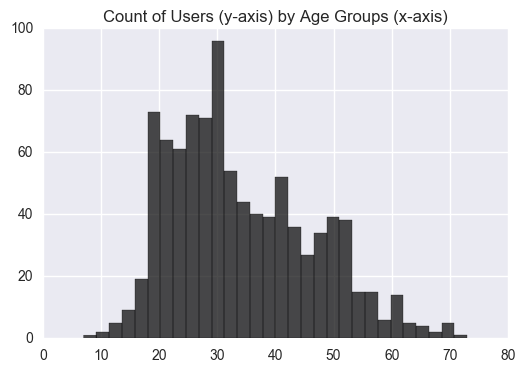

In [36]:
# %load Q3.py

# Distribution of users by age
users['age'].hist(bins=30, color='k', alpha=0.7)
plt.title('Count of Users (y-axis) by Age Groups (x-axis)')

# Binning users into age groups
bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new column
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=bins)

# Check if binning went okay
print lens[['age', 'age_group']].drop_duplicates()[:10]

In [38]:
lens.groupby(['age_group'])['user_id'].nunique()

age_group
0-9        1
10-19     76
20-29    332
30-39    241
40-49    168
50-59     94
60-69     27
70-79      4
Name: user_id, dtype: int64

In [39]:
(pd.pivot_table(data=lens.loc[lens.title.isin(voted_150), :], 
               index='title', 
               columns='age_group', 
               values='rating', 
               aggfunc=np.mean)
 .drop(['0-9', '70-79'], axis=1)
 .std(axis=1)
 .sort_values(ascending=False))[:10]

title
Beavis and Butt-head Do America (1996)          0.910554
Starship Troopers (1997)                        0.752654
Boot, Das (1981)                                0.677041
Fifth Element, The (1997)                       0.653465
Speed (1994)                                    0.561025
Birds, The (1963)                               0.473794
Chasing Amy (1997)                              0.468521
Pretty Woman (1990)                             0.461923
Face/Off (1997)                                 0.455151
Willy Wonka and the Chocolate Factory (1971)    0.443448
dtype: float64

In [ ]:
# Method 2
(lens
 .loc[lens.title.isin(voted_150), :]
 .groupby(['title', 'age_group'])
 .apply(lambda x: x.rating.mean())
).unstack().std(axis=1).sort_values(ascending=False)
### Using `unstack` to convert ***long-to-wide*** data

# A high standard deviation in ratings across groups means that the different age groups gave ratings far from the mean
# I'm ignoring the ratings of the 0-9 and 80-89 age groups because they pollute the results.

### Q4. Which movies do men and women most disagree on?

In [ ]:
countdown(5 * 60)

In [ ]:
# %load Q4.py

pivoted=pd.pivot_table(lens,
                       index=['title'],
                       columns=['sex'],
                       values='rating',
                       aggfunc=np.mean,
                       fill_value=0)
# print pd.concat([pivoted.head(), pivoted.tail()])

In [ ]:
pivoted.reset_index(inplace=True)

In [ ]:
pivoted = pivoted[pivoted.title.isin(voted_150)]

In [ ]:
pivoted.loc[:, 'diff'] = pivoted.loc[:, 'M'] - pivoted.F

In [ ]:
pivoted.sort_values('diff', ascending=False).loc[:, ['title', 'diff']]